In [135]:
!pip install qiskit
!pip install pylatexenc

#Exercice 1

## Q.1
###1.1 ) En informatique classique l'information est représentée sous forme binaire à l'aide de transistors.

###1.2 ) tables de vérités :

#### XOR :

\begin{array}{|l|l|l|}
\hline
A & B & A XOR B \\ \hline
0 & 0 & 0       \\ \hline
0 & 1 & 1       \\ \hline
1 & 0 & 1       \\ \hline
1 & 1 & 0       \\ \hline
\end{array}

#### AND :

\begin{array}{|l|l|l|}
\hline
A & B & A XOR B \\ \hline
0 & 0 & 0       \\ \hline
0 & 1 & 0       \\ \hline
1 & 0 & 0       \\ \hline
1 & 1 & 1       \\ \hline
\end{array}

#### OR :

\begin{array}{|l|l|l|}
\hline
A & B & A XOR B \\ \hline
0 & 0 & 0       \\ \hline
0 & 1 & 1       \\ \hline
1 & 0 & 1       \\ \hline
1 & 1 & 0       \\ \hline
\end{array}


#### NOT :

\begin{array}{|l||l|}
\hline
A & NOT A \\ \hline
0 & 1        \\ \hline
1 & 0        \\ \hline
\end{array}



## Q.2
Dans le cas général un qubit est dans un état qui est combinaison linéaire complexe des deux états d'une base de calcul ($ |0\rangle$  et $ |1\rangle $ par exemple). La mesure d'un qubit le replace dans un des deux états initiaux.Le module au carré des coefficients associés correspond à la probabilité, dans le cas d'une mesure du qubit, d'observer la valeur associée. 



In [150]:
import numpy as np
from qiskit import QuantumCircuit, transpile,assemble
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit import IBMQ
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import plot_bloch_multivector

simulator = QasmSimulator()


## Q.3)

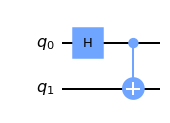

In [137]:

circuit = QuantumCircuit(2) 

#La porte de hadamard fait passer le premier qubit (initialisé avec alpha ou beta = 0) en état de superposition
circuit.h(0)


circuit.cx(0, 1)
circuit.draw(output='mpl')



# Exercice 2

### Porte Controll-NOT (CNOT1) - version avec le qubit de controle en première position. Change l'etat du qubit 1 si le qubit 0 est en état 1. L'état du système passe de 
$a|00\rangle +b|01\rangle +c|10\rangle +d|11\rangle$ 

à $a|00\rangle +b|01\rangle +c|11\rangle +d|10\rangle$

##### Interprétation : on remarque que les coefficients c et d s'échangent. En effet, si lors de la mesure le bit 1 vaut 0 la probabiltié de mesure du deuxième bit ne change pas. Mais si la mesure du premier bit est 1, alors on échange les probabilités de mesure du deuxième bit.

###Matrice CNOT1
${\displaystyle {\mbox{CNOT}}=cX={\begin{bmatrix}1&0&0&0\\0&1&0&0\\0&0&0&1\\0&0&1&0\end{bmatrix}}}$

###Matrice CNOT2 (controle = deuxième qubit)
${\displaystyle {\mbox{CNOT}}=cX={\begin{bmatrix}1&0&0&0\\0&0&0&1\\0&0&1&0\\0&1&0&0\end{bmatrix}}}$

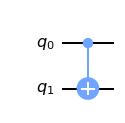

In [ ]:
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.draw(output='mpl')


## Matrice swap : échange les probabilités de mesure 01 et 10.
${\displaystyle {\mbox{SWAP}}={\begin{bmatrix}1&0&0&0\\0&0&1&0\\0&1&0&0\\0&0&0&1\end{bmatrix}}}$


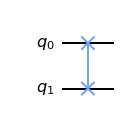

In [ ]:
qc = QuantumCircuit(2)
qc.swap(0,1)
qc.draw(output='mpl')


## Matrice cswap : applique swap avec un bit de controle. Echange a7 et a7.

${\displaystyle {\begin{bmatrix}1&0&0&0&0&0&0&0\\0&1&0&0&0&0&0&0\\0&0&1&0&0&0&0&0\\0&0&0&1&0&0&0&0\\0&0&0&0&1&0&0&0\\0&0&0&0&0&0&1&0\\0&0&0&0&0&1&0&0\\0&0&0&0&0&0&0&1\\\end{bmatrix}}}$

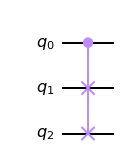

In [ ]:
qc = QuantumCircuit(3)
qc.cswap(0,1,2)
qc.draw(output='mpl')

###Matrice X de Pauli (Not)
${X={\begin{bmatrix}0&1\\1&0\end{bmatrix}}}$






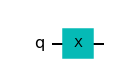

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
qc.draw(output='mpl')


###Puissance du calcul quantique : avec une seule porte, on peut faire un calcul sur tout l'état du système. Avec un ordinateur classique, on interragit indépendemment avec chaque bit.

## 2.2. et 2.3) On implémente un programme qui réalise un état de bell avec une porte de hadamar et CNOT.


 Nombre de mesures : {'11': 494, '00': 506}


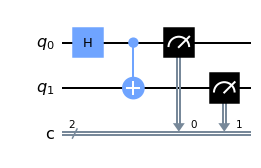

In [152]:

circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)

state = Statevector.from_instruction(circuit)

circuit.measure([0, 1], [0, 1])

compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)

result = job.result()

counts = result.get_counts(compiled_circuit)
print("\n Nombre de mesures :",counts)

circuit.draw(output='mpl')



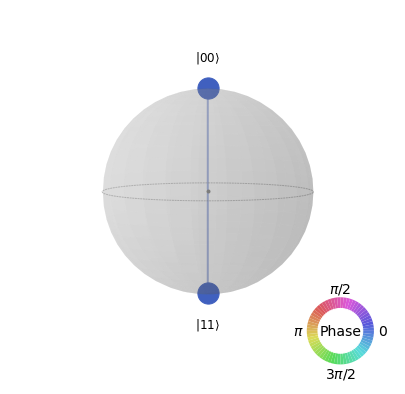

In [153]:
plot_state_qsphere(state)


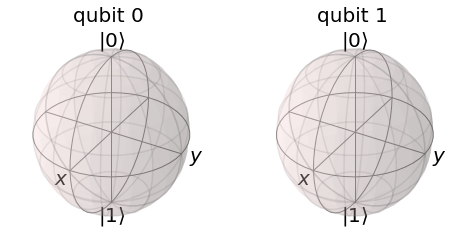

In [154]:
plot_bloch_multivector(state, reverse_bits=False)

Les états de bell étant dits "maximalement intriqués", cela signifie que la corrélation entre l'information entre celle individuelle sur chaque qubit et celle du système est nulle. Sur d'autres systèmes plus faiblements intriqués ou indépendants, on observera des vecteurs de bloch non nuls.

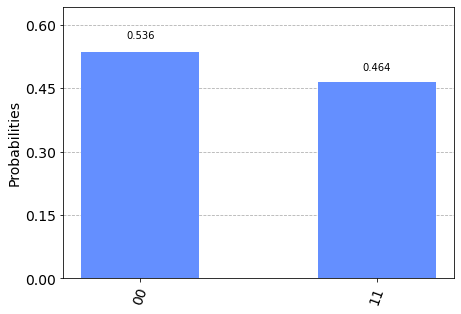

In [ ]:
plot_histogram(counts)

##2.4) On peut construire une matrice swap avec une porte swap ou avec trois portes CNOT. Preuve par multiplication matricielle. Preuve :

In [ ]:

CNOT1 = np.array([[1, 0,0,0],
              [0, 1,0,0],
              [0,0,0,1],
              [0,0,1,0]])

CNOT2 = np.array([[1, 0,0,0], 
              [0, 0,0,1],
              [0,0,1,0],
              [0,1,0,0]])

np.matmul(np.matmul(CNOT2, CNOT1),CNOT2)

array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]])

Le résultat de la multiplication CNOT2 x CNOT1 x CNOT2 donne bien la matrice SWAP.

Ainsi les deux circuits suivants sont équivalents :

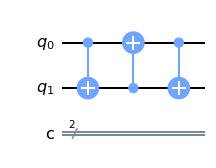

In [ ]:
#circuit 1 :
circuit = QuantumCircuit(2, 2)
circuit.cnot(0, 1)
circuit.cnot(1, 0)
circuit.cnot(0, 1)
circuit.draw(output='mpl')

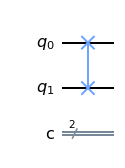

In [ ]:
#circuit 2 :
circuit = QuantumCircuit(2, 2)
circuit.swap(0,1)
circuit.draw(output='mpl')

De même la porte de Toffoli (CCNOT), selon le contrôle utilisé, permet de retrouver la porte de Fredkin (ou porte CSWAP). Voici la preuve par calcul matricielle.

In [ ]:
CCNOT01 = np.matrix([
              [1,0,0,0,0,0,0,0],
              [0,1,0,0,0,0,0,0],
              [0,0,1,0,0,0,0,0],
              [0,0,0,1,0,0,0,0],
              [0,0,0,0,1,0,0,0],
              [0,0,0,0,0,1,0,0],
              [0,0,0,0,0,0,0,1],
              [0,0,0,0,0,0,1,0]
              ])

CCNOT02 = np.matrix([
              [1,0,0,0,0,0,0,0],
              [0,1,0,0,0,0,0,0],
              [0,0,1,0,0,0,0,0],
              [0,0,0,1,0,0,0,0],
              [0,0,0,0,1,0,0,0],
              [0,0,0,0,0,0,0,1],
              [0,0,0,0,0,0,1,0],
              [0,0,0,0,0,1,0,0]
              ])

CSWAP = np.matmul(np.matmul(CCNOT02, CCNOT01),CCNOT02)


matrix([[1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1]])

On retombe bien sur la matrice de Fredkin.

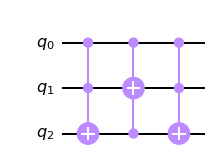

In [ ]:
#circuit 1

qc = QuantumCircuit(3)
qc.ccx(0,1,2)
qc.ccx(0,2,1)
qc.ccx(0,1,2)

qc.draw(output='mpl')


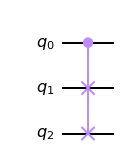

In [ ]:
#circuit 2

qc = QuantumCircuit(3)
qc.cswap(0,1,2)

qc.draw(output='mpl')

#Exercice 3. On reprend le circuit de l'état de bell



 Nombre de mesures : {'11': 489, '00': 511}


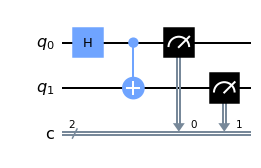

In [ ]:

circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0, 1], [0, 1])

compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)

result = job.result()

counts = result.get_counts(compiled_circuit)
print("\n Nombre de mesures :",counts)

circuit.draw(output='mpl')

###Matriciellement voyons l'impact de la matrice de hadamar sur un qubit $x = (1,0)$
$
{\displaystyle Hx={\frac {1}{\sqrt {2}}}{\begin{bmatrix}1&1\\1&-1\end{bmatrix}}\begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}\frac{1}{2}\\\frac{1}{2}\end{bmatrix}}
$

###Ainsi la probabilité d'obtenir une mesure 0 comme une mesure 1 sur le qubit q devient 1/2. La porte CNOT crée une dépendance des états de sortie et intègre ainsi de l'intrication au système.

### Sur un système à deux qubits, on peut observer l'état du système suivant l'avancement dans le circuit. 



\begin{array}{|l|l|l|l|}
\hline
q0~\text{initial} & q1~\text{initial} & \text{Etat du systeme après Hadamar} & \text{Etat en sortie après hadamar et CNOT}\\ \hline
0 & 0 & \frac{1}{2}(|00\rangle + |10\rangle) & \frac{1}{2}(|00\rangle + |11\rangle)      \\ \hline
0 & 1 & \frac{1}{2}(|01\rangle + |11\rangle) & \frac{1}{2}(|01\rangle + |10\rangle)      \\ \hline 
1 & 0 & \frac{1}{2}(|00\rangle - |10\rangle) & \frac{1}{2}(|00\rangle - |11\rangle)      \\ \hline
1 & 1 & \frac{1}{2}(|01\rangle - |11\rangle) & \frac{1}{2}(|01\rangle - |10\rangle)     \\ \hline
\end{array}




Mathématiquement l'intrication se retrouve dans l'impossibilité de décomposer ces états de bell comme le produit tensoriel de deux qubits. En termes d'information, elle traduit le fait qu'étant donné une initialisation, la connaissance de l'un des qubits donne une information sur l'état de l'autre.

Passons à la simulation des états de Bell sur l'IMB cloud :

In [ ]:
token = '01dff5c9f481efb7a62e7877d62f55bdb60a910b7cfb4262110169d32819bfe8654697c251d9ad140b8e34f75c908beeb2ed37d74efad5e8ad60ceb66014fe2b'
IBMQ.enable_account(token)

In [146]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends(simulator=False, operational=True)
backend = provider.get_backend('ibmq_lima') #parfois, certains ne marchent pas
backend

[<IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [ ]:
from qiskit import *

circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0, 1], [0, 1])


In [ ]:
job = execute(circuit, backend)

In [ ]:
job.status() #3 valeurs possibles : Job error / Job is queued / Job has successfully run

<JobStatus.DONE: 'job has successfully run'>

In [ ]:
result = job.result()
counts = result.get_counts()
print(counts)

{'00': 516, '01': 72, '10': 21, '11': 415}


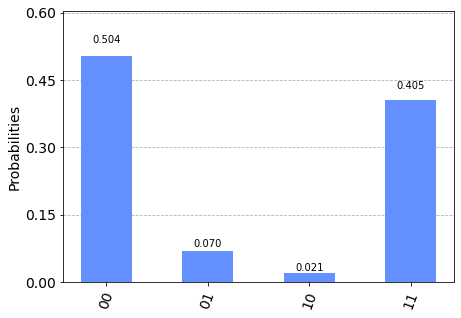

In [ ]:
plot_histogram(counts)

On note qu'avec un vrai ordinateur quantique, les résultats sont sensiblements différents. Cela peut etre du à des erreurs de connaissance des états des qubits qui suffisent à avoir des résultats différents de ceux théoriques sur un grand nombre d'executions.


#Exercice 4 

Nous aurons besoin d'un registre de trois qubits pour réaliser la téléportation quantique.
Celui du haut contient sur le diagram le qubit à téléporter.


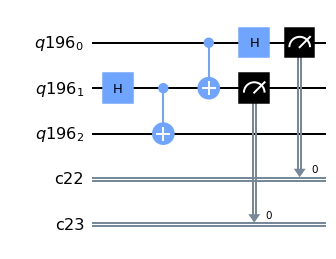

In [147]:
qr = QuantumRegister(3)    
classic_bits = ClassicalRegister(1) 
registers = ClassicalRegister(1) 
circuit = QuantumCircuit(qr, classic_bits, registers)

#Paire de bell (hadamar, cnot)
circuit.h(1) 
circuit.cx(1,2) 

##Etapes de alice
circuit.cx(0, 1)
circuit.h(0)

#Mesure/envoi
circuit.measure(0,0)
circuit.measure(1,1)

circuit.draw(output='mpl')

Comme expliqué sur wikipedia, le circuit a en sortie le qubit d'alice dans 25% des cas, lorsque la mesure est 00.
En effet le qubit avant mesure est le suivant : 
${\begin{matrix}\left\vert \psi \right\rangle &=&{\frac  {1}{2}}\left\vert 0_{A}0_{A}\right\rangle \left(\alpha \left\vert 0_{B}\right\rangle +\beta \left\vert 1_{B}\right\rangle \right)\\&+&{\frac  {1}{2}}\left\vert 0_{A}1_{A}\right\rangle \left(\beta \left\vert 0_{B}\right\rangle +\alpha \left\vert 1_{B}\right\rangle \right)\\&+&{\frac  {1}{2}}\left\vert 1_{A}0_{A}\right\rangle \left(\alpha \left\vert 0_{B}\right\rangle -\beta \left\vert 1_{B}\right\rangle \right)\\&-&{\frac  {1}{2}}\left\vert 1_{A}1_{A}\right\rangle \left(\beta \left\vert 0_{B}\right\rangle -\alpha \left\vert 1_{B}\right\rangle \right)\end{matrix}}$

On peut donc ajouter que selon la mesure, Bob peut retrouver le qubit d'Alice avec une opération. Par exemple, si la mesure est 01 et que Bob reçoit le qubit :

$\left\vert 0_{A}1_{A}\right\rangle \left(\beta \left\vert 0_{B}\right\rangle +\alpha \left\vert 1_{B}\right\rangle \right)$

Il peut appliquer un opérateur NOT (porte de pauli X) pour retrouver le qubit d'Alice. Dans les autres cas on peut également utiliser Z et ZX pour retrouver le bon qubit.

Le circuit dessiné est complétable pour assurer ces opérations, qui sont effectuées par Bob (3eme qubit).


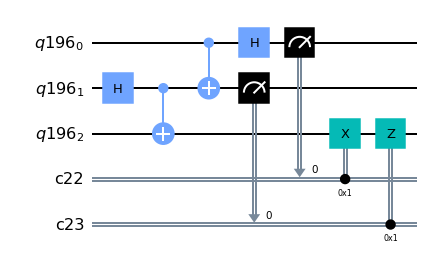

In [148]:
circuit.x(2).c_if(classic_bits, 1) 
circuit.z(2).c_if(registers, 1) 
circuit.draw(output='mpl')

En termes d'information, on peut interpréter le circuit de la sorte : on intrique le qubit du milieu avec celui de Bob, puis celui d'Alice avec le qubit du milieu. Ainsi, le qubit d'Alice et de Bob sont transitivement intriqués.